In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 5.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       accumulation_steps=2,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search facebook/opt-350m, learning rate 5e-05, focal loss gamma 2


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	8.3479	Val Loss:	1.6998	Accuracy:	0.3462	F1:	0.2964
2 / 30: Train Loss:	3.4873	Val Loss:	1.3412	Accuracy:	0.5858	F1:	0.5678
3 / 30: Train Loss:	4.1282	Val Loss:	1.9376	Accuracy:	0.2988	F1:	0.2250
4 / 30: Train Loss:	7.8916	Val Loss:	2.4034	Accuracy:	0.0385	F1:	0.0082
5 / 30: Train Loss:	8.2515	Val Loss:	2.3529	Accuracy:	0.0414	F1:	0.0088
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.75      0.31      0.44        67
               anecdote       0.55      0.95      0.69        43
         cherry picking       0.66      0.45      0.53        56
      conspiracy theory       0.55      0.77      0.64        39
           fake experts       0.41      0.75      0.53        12
           false choice       0.42      0.77      0.54        13
      false equivalence       0.44      0.50      0.47        14
impossible expectations       0

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.2670	Val Loss:	1.7289	Accuracy:	0.3107	F1:	0.2614
2 / 30: Train Loss:	2.5205	Val Loss:	1.2222	Accuracy:	0.5680	F1:	0.5294
3 / 30: Train Loss:	1.8421	Val Loss:	2.0614	Accuracy:	0.1686	F1:	0.1608
4 / 30: Train Loss:	8.1863	Val Loss:	2.3543	Accuracy:	0.0385	F1:	0.0082
5 / 30: Train Loss:	6.5319	Val Loss:	2.3489	Accuracy:	0.0385	F1:	0.0082
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.82      0.42      0.55        67
               anecdote       0.64      0.91      0.75        43
         cherry picking       0.53      0.55      0.54        56
      conspiracy theory       0.68      0.67      0.68        39
           fake experts       0.50      0.67      0.57        12
           false choice       0.26      0.92      0.41        13
      false equivalence       0.13      0.14      0.14        14
impossible expectations       0

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	6.1552	Val Loss:	1.7617	Accuracy:	0.2959	F1:	0.2792
2 / 30: Train Loss:	1.5624	Val Loss:	1.3052	Accuracy:	0.5533	F1:	0.5046
3 / 30: Train Loss:	0.8348	Val Loss:	1.9126	Accuracy:	0.2959	F1:	0.2709
4 / 30: Train Loss:	3.7567	Val Loss:	2.1001	Accuracy:	0.1479	F1:	0.0528
5 / 30: Train Loss:	4.0848	Val Loss:	2.1428	Accuracy:	0.1834	F1:	0.1604
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.76      0.28      0.41        67
               anecdote       0.74      0.86      0.80        43
         cherry picking       0.65      0.50      0.57        56
      conspiracy theory       0.60      0.67      0.63        39
           fake experts       0.39      0.75      0.51        12
           false choice       0.28      0.85      0.42        13
      false equivalence       0.17      0.07      0.10        14
impossible expectations       0

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	4.7877	Val Loss:	1.8171	Accuracy:	0.2840	F1:	0.2196
2 / 30: Train Loss:	0.6899	Val Loss:	1.6188	Accuracy:	0.3846	F1:	0.3713
3 / 30: Train Loss:	0.2980	Val Loss:	1.4735	Accuracy:	0.3876	F1:	0.3438
4 / 30: Train Loss:	0.1570	Val Loss:	1.4631	Accuracy:	0.3964	F1:	0.4134
5 / 30: Train Loss:	0.2415	Val Loss:	1.3715	Accuracy:	0.4763	F1:	0.3931
6 / 30: Train Loss:	1.5614	Val Loss:	2.1073	Accuracy:	0.2071	F1:	0.1956
7 / 30: Train Loss:	1.9827	Val Loss:	2.2867	Accuracy:	0.0385	F1:	0.0082
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.66      0.34      0.45        67
               anecdote       0.87      0.63      0.73        43
         cherry picking       0.67      0.14      0.24        56
      conspiracy theory       0.39      0.79      0.52        39
           fake experts       0.62      0.67      0.64        12
           false 

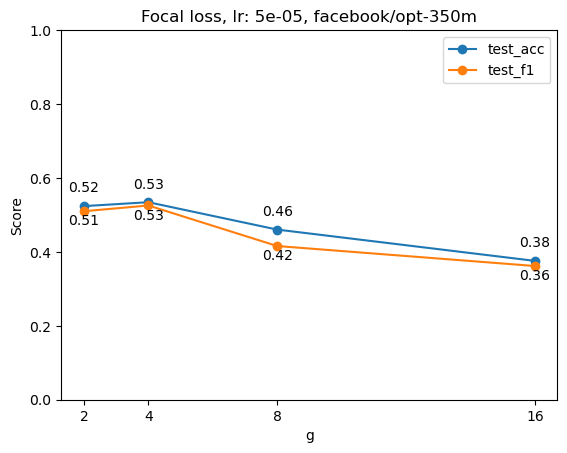

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f